## PyTorch Tensor Slicing and Concatenation

In [1]:
import torch

## Slicing and Concatenation

### Indexing and Slicing

Prepare target tensor.

In [27]:
x = torch.FloatTensor([[[1, 2],
                        [3, 4]],
                       [[5, 6],
                        [7, 8]],
                       [[9, 10],
                        [11, 12]]])
print(x.size())

torch.Size([3, 2, 2])


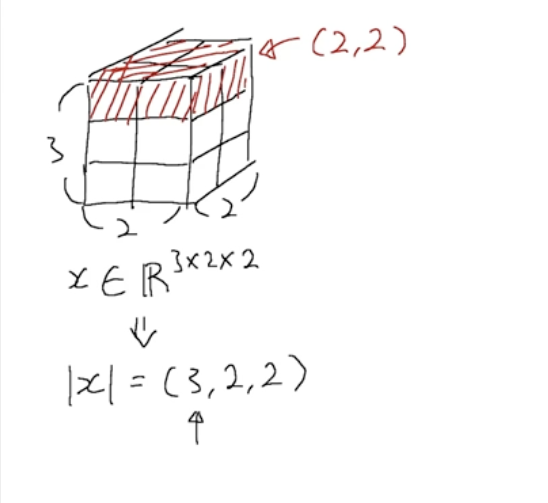

Access to certain dimension.

In [13]:
x[0,0:,:]

tensor([[1., 2.],
        [3., 4.]])

In [3]:
print(x[0])
print(x[0, :])
print(x[0, :, :])

tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[1., 2.],
        [3., 4.]])


In [13]:
print(x[-1])
print(x[-1, :])
print(x[-1, :, :])

tensor([[ 9., 10.],
        [11., 12.]])
tensor([[ 9., 10.],
        [11., 12.]])
tensor([[ 9., 10.],
        [11., 12.]])


In [14]:
x.size()

torch.Size([3, 2, 2])

In [26]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [14]:
print(x[:, 0, :])

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])


Access by range. Note that the number of dimensions would not be changed.

In [15]:
print(x[1:3, :, :].size())
print(x[:, :1, :].size())
print(x[:, :-1, :].size())

torch.Size([2, 2, 2])
torch.Size([3, 1, 2])
torch.Size([3, 1, 2])


In [17]:
x[:, :1, :]

tensor([[[ 1.,  2.]],

        [[ 5.,  6.]],

        [[ 9., 10.]]])

### split: Split tensor to desirable shapes.

In [33]:
x = torch.FloatTensor(10, 4)

In [17]:
splits = x.split(4, dim=0)

for s in splits:
    print(s.size())

torch.Size([4, 4])
torch.Size([4, 4])
torch.Size([2, 4])


In [27]:
s

tensor([[1.8217e-44, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]])

### chunk: Split tensor to number of chunks.

In [21]:
x = torch.FloatTensor(8, 4)

In [22]:
chunks = x.chunk(3, dim=0)

for c in chunks:
    print(c.size())

torch.Size([3, 4])
torch.Size([3, 4])
torch.Size([2, 4])


In [26]:
c

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

### index_select: Select elements by using dimension index.

In [28]:
x = torch.FloatTensor([[[1, 1],
                        [2, 2]],
                       [[3, 3],
                        [4, 4]],
                       [[5, 5],
                        [6, 6]]])
indice = torch.LongTensor([2, 1])

print(x.size())

torch.Size([3, 2, 2])


In [29]:
indice

tensor([2, 1])

In [12]:
y = x.index_select(dim=0, index=indice)

print(y)
print(y.size())

tensor([[[5., 5.],
         [6., 6.]],

        [[3., 3.],
         [4., 4.]]])
torch.Size([2, 2, 2])


### cat: Concatenation of multiple tensors in the list.

In [20]:
x = torch.FloatTensor([[1, 2, 3],
                       [4, 5, 6],
                       [7, 8, 9]])
y = torch.FloatTensor([[10, 11, 12],
                       [13, 14, 15],
                       [16, 17, 18]])

print(x.size(), y.size())

torch.Size([3, 3]) torch.Size([3, 3])


In [21]:
z = torch.cat([x, y], dim=0)
print(z)
print(z.size())

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])
torch.Size([6, 3])


In [22]:
z = torch.cat([x, y], dim=-1)
print(z)
print(z.size())

tensor([[ 1.,  2.,  3., 10., 11., 12.],
        [ 4.,  5.,  6., 13., 14., 15.],
        [ 7.,  8.,  9., 16., 17., 18.]])
torch.Size([3, 6])


### stack: Stacking of multiple tensors in the list.

In [23]:
z = torch.stack([x, y])
print(z)
print(z.size())

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])
torch.Size([2, 3, 3])


Or you can specify the dimension. Default is 0.

In [24]:
x

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [25]:
y

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [17]:
z = torch.stack([x, y], dim=-1)
print(z)
print(z.size())

tensor([[[ 1., 10.],
         [ 2., 11.],
         [ 3., 12.]],

        [[ 4., 13.],
         [ 5., 14.],
         [ 6., 15.]],

        [[ 7., 16.],
         [ 8., 17.],
         [ 9., 18.]]])
torch.Size([3, 3, 2])


### Implement 'stack' function by using 'cat'.

In [18]:
# z = torch.stack([x, y])
z = torch.cat([x.unsqueeze(0), y.unsqueeze(0)], dim=0)
print(z)
print(z.size())

tensor([[[ 1.,  2.,  3.],
         [ 4.,  5.,  6.],
         [ 7.,  8.,  9.]],

        [[10., 11., 12.],
         [13., 14., 15.],
         [16., 17., 18.]]])
torch.Size([2, 3, 3])


### Useful Trick: Merge results from iterations

In [67]:
result = []
for i in range(5):
    x = torch.FloatTensor(2, 2)
    result += [x]
result = torch.stack(result)
result.size()


torch.Size([5, 2, 2])

In [68]:
result

tensor([[[ 1.1210e-44,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00]],

        [[ 5.3477e+22,  1.0739e-05],
         [ 4.1300e-05,  1.2858e-11]],

        [[ 0.0000e+00,  0.0000e+00],
         [ 4.2195e-08,  2.9387e-40]],

        [[ 0.0000e+00,  0.0000e+00],
         [ 0.0000e+00, -4.6566e-10]],

        [[ 4.4859e-36,  1.4013e-45],
         [ 4.5999e-36,  1.4013e-45]]])